<a href="https://colab.research.google.com/github/abhi-0087/Indian-Agriculture-Analysis/blob/main/Indian_Agriculture_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# Load the dataset
df = pd.read_excel('/content/ICRISAT-District Level Data.xlsx')


In [75]:
# Clean column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [76]:
# Replace negative values (-1) with NaN
df.replace(-1, pd.NA, inplace=True)

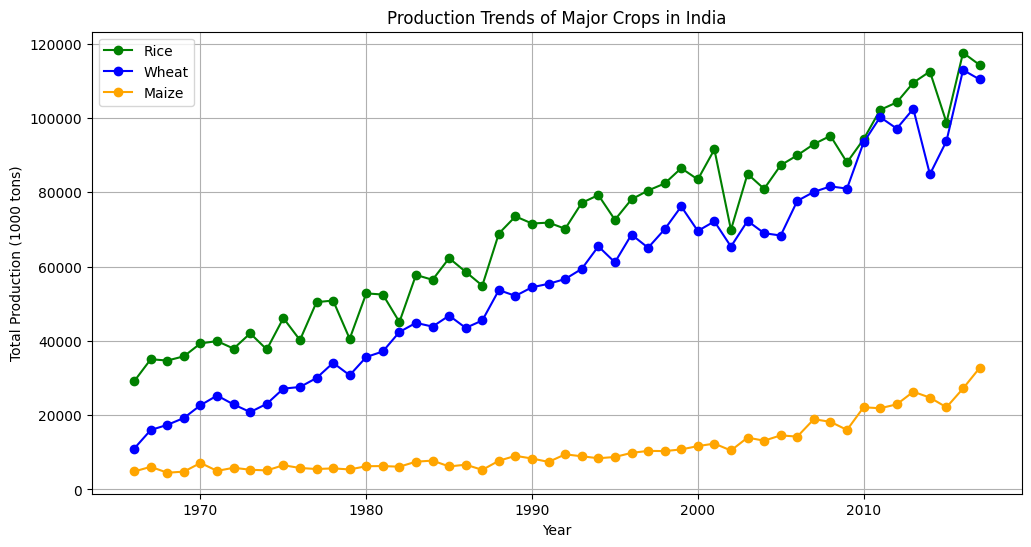

In [77]:
# 1. Production trends for major crops
def plot_crop_trends(crop, color):
    crop_trend = df.groupby("year")[f"{crop}_production_(1000_tons)"].sum()
    plt.plot(crop_trend.index, crop_trend.values, marker="o", linestyle="-", label=crop.capitalize(), color=color)

plt.figure(figsize=(12, 6))
plot_crop_trends("rice", "green")
plot_crop_trends("wheat", "blue")
plot_crop_trends("maize", "orange")
plt.title("Production Trends of Major Crops in India")
plt.xlabel("Year")
plt.ylabel("Total Production (1000 tons)")
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1400x600 with 0 Axes>

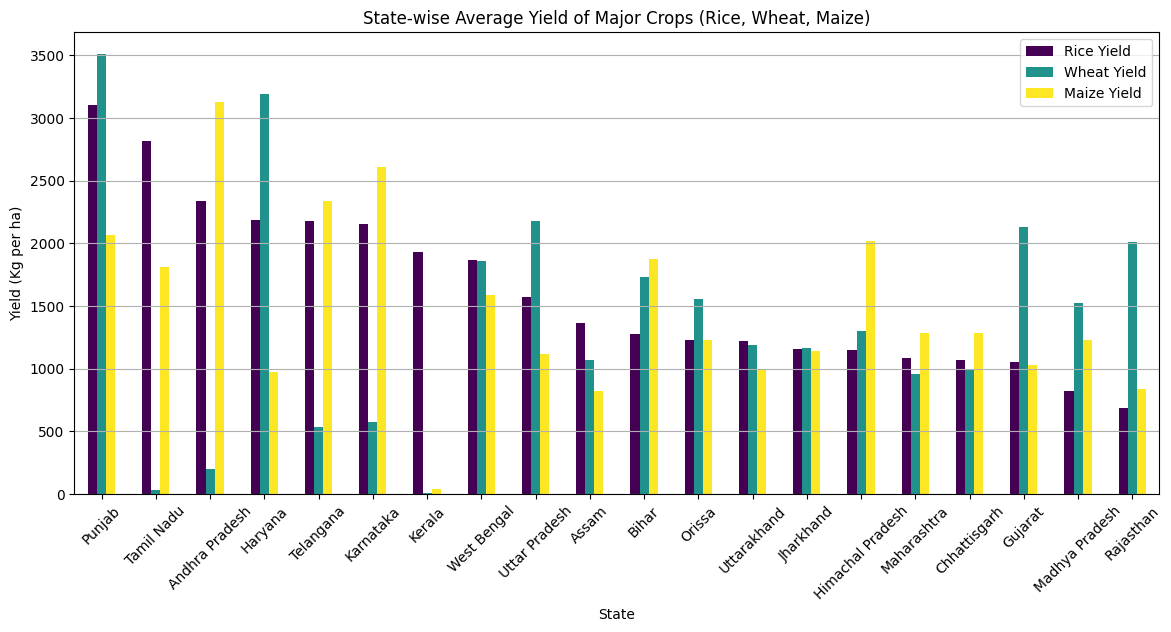

In [78]:
# 2. State-wise crop yield analysis
state_yield = df.groupby("state_name")[
    ["rice_yield_(kg_per_ha)", "wheat_yield_(kg_per_ha)", "maize_yield_(kg_per_ha)"]
].mean()
state_yield.sort_values("rice_yield_(kg_per_ha)", ascending=False, inplace=True)

plt.figure(figsize=(14, 6))
state_yield.plot(kind="bar", colormap="viridis", figsize=(14, 6))
plt.title("State-wise Average Yield of Major Crops (Rice, Wheat, Maize)")
plt.xlabel("State")
plt.ylabel("Yield (Kg per ha)")
plt.xticks(rotation=45)
plt.legend(["Rice Yield", "Wheat Yield", "Maize Yield"], loc='upper right')
plt.grid(axis="y")
plt.show()

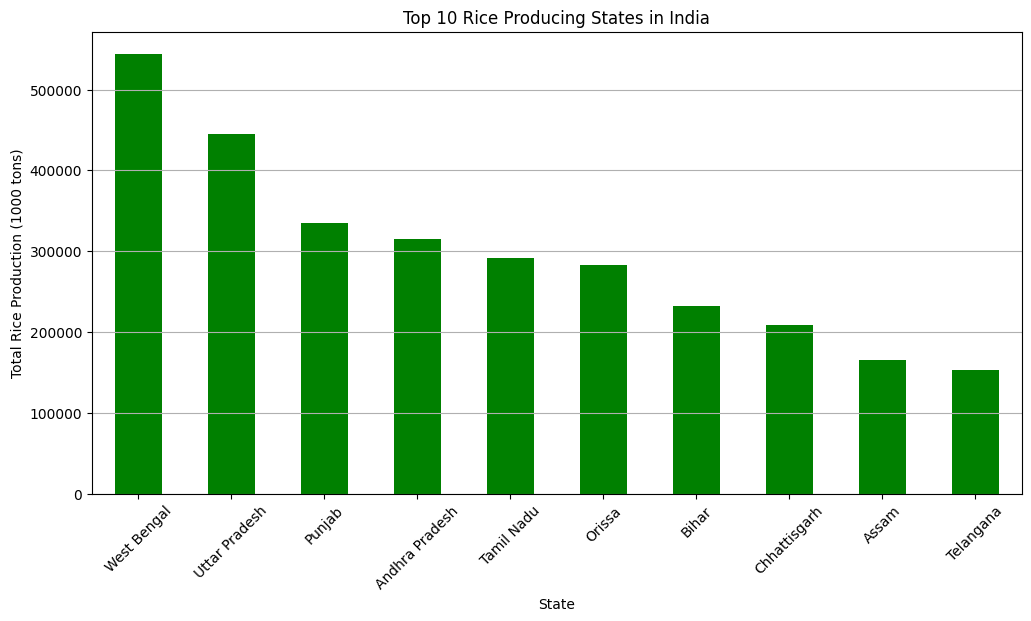

In [79]:
# 3. Rice production by state (total over all years)
rice_statewise = df.groupby("state_name")["rice_production_(1000_tons)"].sum().sort_values(ascending=False)

# Plot the top 10 states in rice production
plt.figure(figsize=(12, 6))
rice_statewise.head(10).plot(kind="bar", color="green")
plt.title("Top 10 Rice Producing States in India")
plt.xlabel("State")
plt.ylabel("Total Rice Production (1000 tons)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

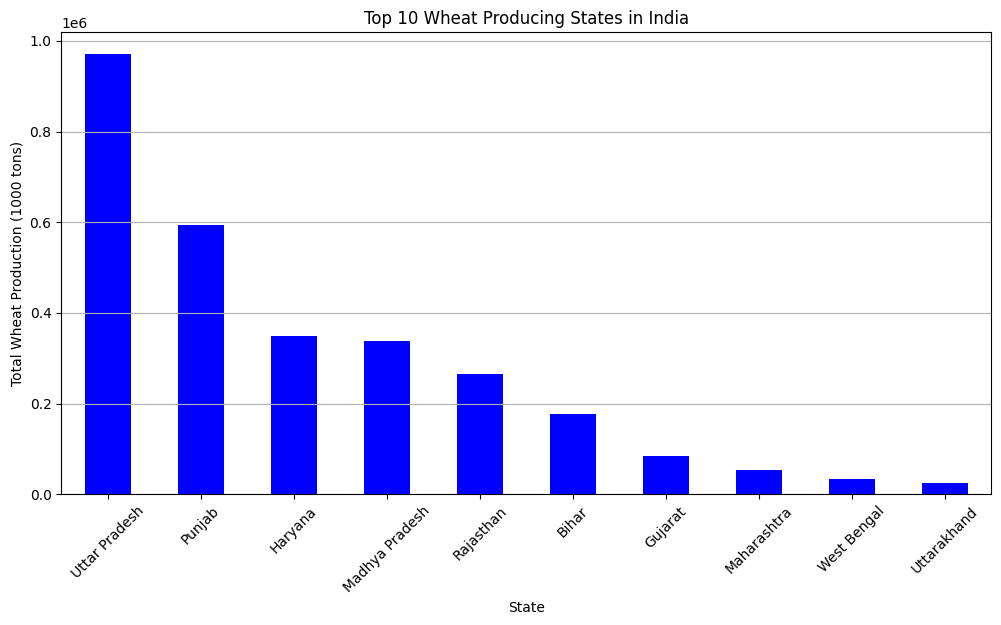

In [80]:
# 4. Wheat production by state
wheat_statewise = df.groupby("state_name")["wheat_production_(1000_tons)"].sum().sort_values(ascending=False)

# Plot the top 10 wheat-producing states
plt.figure(figsize=(12, 6))
wheat_statewise.head(10).plot(kind="bar", color="blue")
plt.title("Top 10 Wheat Producing States in India")
plt.xlabel("State")
plt.ylabel("Total Wheat Production (1000 tons)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

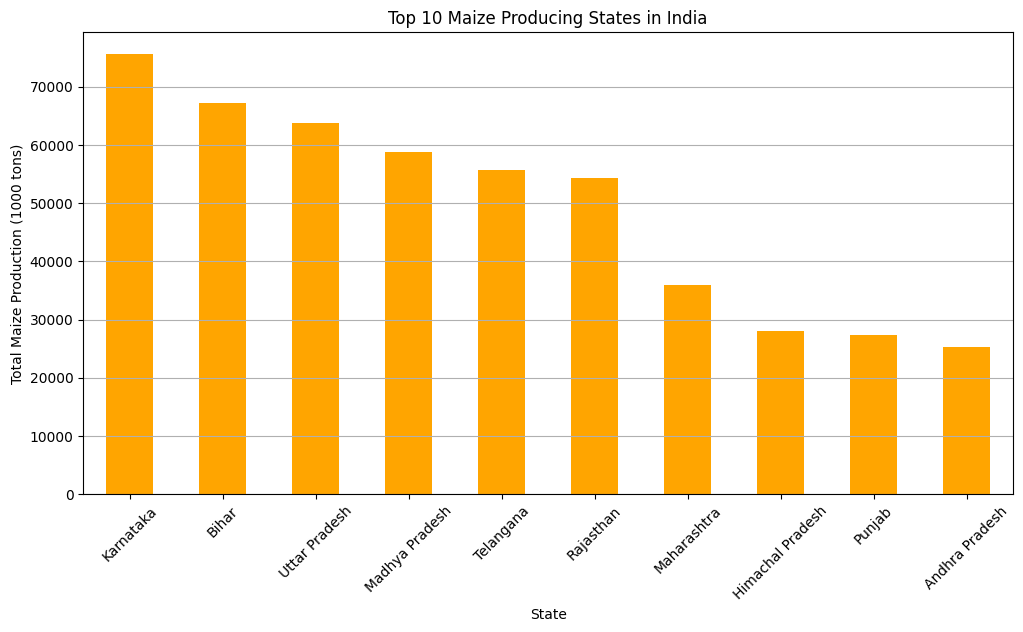

In [81]:
# 5. Maize production by state
maize_statewise = df.groupby("state_name")["maize_production_(1000_tons)"].sum().sort_values(ascending=False)

# Plot the top 10 maize-producing states
plt.figure(figsize=(12, 6))
maize_statewise.head(10).plot(kind="bar", color="orange")
plt.title("Top 10 Maize Producing States in India")
plt.xlabel("State")
plt.ylabel("Total Maize Production (1000 tons)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

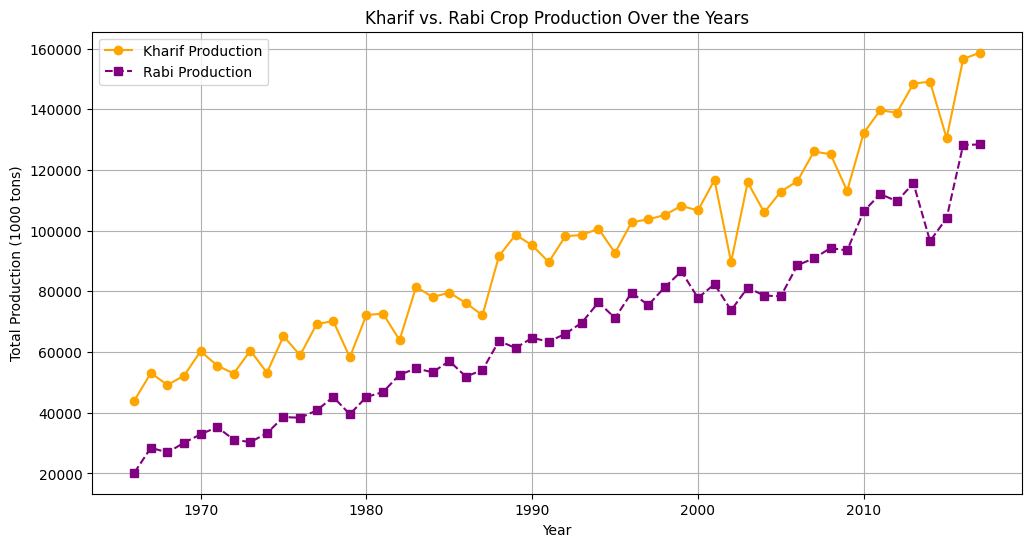

In [82]:
# 6. Plot Kharif vs. Rabi Crop Production Over the Years
plt.figure(figsize=(12, 6))
plt.plot(kharif_production_trend.index, kharif_production_trend.values, marker="o", linestyle="-", label="Kharif Production", color="orange")
plt.plot(rabi_production_trend.index, rabi_production_trend.values, marker="s", linestyle="--", label="Rabi Production", color="purple")
plt.title("Kharif vs. Rabi Crop Production Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Production (1000 tons)")
plt.legend()
plt.grid(True)
plt.show()

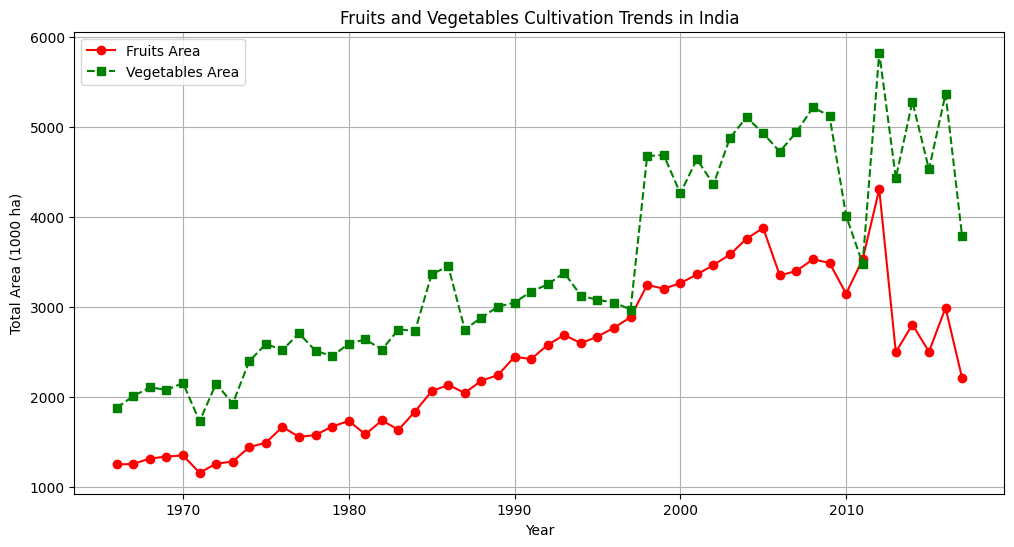

In [83]:
# 7. Total area for Fruits and Vegetables over the years
fruits_area_trend = df.groupby("year")["fruits_area_(1000_ha)"].sum()
vegetables_area_trend = df.groupby("year")["vegetables_area_(1000_ha)"].sum()

# Plot Fruits & Vegetables Cultivation Trends
plt.figure(figsize=(12, 6))
plt.plot(fruits_area_trend.index, fruits_area_trend.values, marker="o", linestyle="-", label="Fruits Area", color="red")
plt.plot(vegetables_area_trend.index, vegetables_area_trend.values, marker="s", linestyle="--", label="Vegetables Area", color="green")

# Labels and legend
plt.title("Fruits and Vegetables Cultivation Trends in India")
plt.xlabel("Year")
plt.ylabel("Total Area (1000 ha)")
plt.legend()
plt.grid(True)
plt.show()

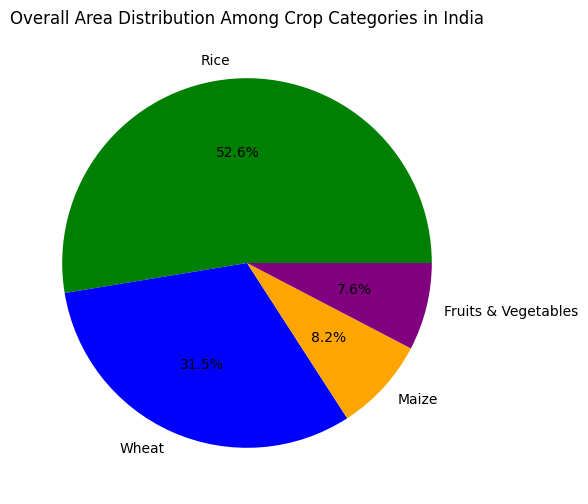

In [84]:
# 8. Total area distribution for different crop categories
crop_areas = {
    "Rice": df["rice_area_(1000_ha)"].sum(),
    "Wheat": df["wheat_area_(1000_ha)"].sum(),
    "Maize": df["maize_area_(1000_ha)"].sum(),
    "Fruits & Vegetables": df["fruits_and_vegetables_area_(1000_ha)"].sum()
}

# Convert to DataFrame for visualization
crop_areas_df = pd.DataFrame(crop_areas.items(), columns=["Crop Category", "Total Area (1000 ha)"])

# Plot Area Distribution as a Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(crop_areas_df["Total Area (1000 ha)"], labels=crop_areas_df["Crop Category"], autopct="%1.1f%%",
        colors=["green", "blue", "orange", "purple"])
plt.title("Overall Area Distribution Among Crop Categories in India")
plt.show()